In [1]:
import pyemu
import conda_scripts.load_datasets as lsd
import os
import pandas as pd
import numpy as np
import conda_scripts
import forward_run
import matplotlib.pyplot as plt
import conda_scripts.plot_help as ph
from conda_scripts import sv_budget
import matplotlib as mpl
import numpy as np
import flopy
import geopandas as gpd

loading forward_run.py from C:\GSP\sv\model\update_2024\scripts


C:\GSP\sv\model\update_2024\scripts\forward_run.py:149: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:333: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:363: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:578: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:617: DeprecationWarning: invalid escape sequence \s


In [2]:
workspace = lsd.model_info.get_mod('son', True)
workspace

'C:\\GSP\\sv\\model\\SV_mod_V2_owhm2\\master'

In [3]:
main = 'postprocess'
fold =  'pestaws_v1'

out_folder = os.path.join(main, fold)
if not os.path.exists(out_folder):
    os.makedirs(out_folder, exist_ok =True)

In [4]:
ml = conda_scripts.sv_budget.load_sv_model.get_model(workspace)

C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.


Loaded ibound from arrays inside model_arrays
date range is 1969-12-31 00:00:00 to 2018-09-30 00:00:00
the start date is 12/1/1969
126569.41734971055 53725.53016727514


C:\rich_py\conda_scripts\conda_scripts\utils\get_dates.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.


In [5]:
workspace

'C:\\GSP\\sv\\model\\SV_mod_V2_owhm2\\master'

In [6]:
import flopy.modflow.mfhob as hfb
import flopy.modflow.mfhyd as hyd

In [7]:
df = pd.read_csv(r"C:\GSP\waterlevel\GIS\hydro_experiment\hydros__v3_SON_allmodmonths_to_20240808\hydros_predicted_SON.csv")

In [8]:
df = df.query('`Station Name`.str.contains("_mod") == False', engine='python')

In [9]:
df = df.drop_duplicates(['Station Name', 'datetime'])

In [10]:
df.loc[:,'Depth'] = "Other"
df.loc[df.Shallow,'Depth'] = "Shallow"
df.loc[df.Deep,'Depth'] = "Deep"

df = df.loc[~(df.Depth=='Other')]
df.drop_duplicates('Station Name').Depth.value_counts()



Depth
Shallow    119
Deep        87
Name: count, dtype: int64

In [11]:
lrc = df.drop_duplicates('Station Name').set_index('Station Name').apply( lambda row: ml.modelgrid.intersect(row['Easting'], row['Northing']),axis = 1)

lrc = pd.DataFrame(lrc.to_list(), index = lrc.index, columns=['i','j'])

In [12]:
df = pd.merge(df, lrc, left_on = 'Station Name', right_index = True)

In [13]:
df.query("Deep==True | Shallow==True").columns

Index(['Unnamed: 0', 'Station Name', 'Manual Measurement', 'Timestamp',
       'year_frac', 'date_frac', 'Site', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Well_Depth_Category', 'rasterelevation', 'slope',
       'Simple_Bou', 'Complete_B', 'isostatic', 'index_right', 'Geol_Krig',
       'Depth_Reclass', 'ts', 'precip0', 'precip1', 'precip2', 'precip3',
       'precip4', 'precip5', 'precip6', 'precip7', 'precip8', 'precip9',
       'tmean_anom0', 'tmean_anom1', 'tmean_anom2', 'tmean_anom3',
       'tmean_anom4', 'tmean_anom5', 'tmean_anom6', 'tmean_anom7',
       'tmean_anom8', 'tmean_anom9', 'Deep', 'Other', 'Shallow', 'SON',
       'predicted', 'datetime', 'Depth', 'i', 'j'],
      dtype='object')

In [14]:
df

,Unnamed: 0,Station Name,Manual Measurement,Timestamp,year_frac,date_frac,Site,Easting,Northing,Latitude,...,tmean_anom9,Deep,Other,Shallow,SON,predicted,datetime,Depth,i,j
0,0,PLP04-0051_1,7.24,2010-02-01,0.084699,1975.002732,SON,6428936.361,1848074.064,38.235918,...,37.90608,False,False,True,True,4.864785,1975-01-01,Shallow,164,29
1,35,PLP05-0089_1,219.11,2023-02-01,0.084699,1975.002732,SON,6417748.932,1889313.967,38.348993,...,37.90608,False,False,True,True,213.128765,1975-01-01,Shallow,80,41
3,101,PLP07-0037_1,-5.24,2014-02-01,0.084699,1975.002732,SON,6436251.406,1855542.022,38.256523,...,37.90608,True,False,False,True,15.432648,1975-01-01,Deep,156,49
5,122,PLP09-0062_1,12.60,2010-02-01,0.084699,1975.002732,SON,6440254.446,1851645.599,38.245876,...,37.90608,False,False,True,True,1.747099,1975-01-01,Shallow,167,53
6,127,PLP09-0098_1,-1.44,2014-01-01,0.084699,1975.002732,SON,6430866.171,1842769.278,38.221379,...,37.90608,False,False,True,True,7.592655,1975-01-01,Shallow,176,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248498,8201,Son0565,0.17,2022-09-01,0.915301,2023.833333,SON,6420502.971,1860731.894,38.270553,...,107.40608,True,False,False,True,10.700000,2023-11-01,Deep,135,24
248510,8504,WRM22-0063_2,-20.34,2023-01-01,0.915301,2023.833333,SON,6433917.305,1822180.838,38.164888,...,107.40608,True,False,False,True,-12.540000,2023-11-01,Deep,216,18
248511,8508,WRM23-0004_1,-14.31,2023-01-01,0.915301,2023.833333,SON,6435502.621,1855690.211,38.256920,...,107.40608,True,False,False,True,-27.270353,2023-11-01,Deep,156,47
248512,8512,WRM23-0005_1,-28.95,2023-07-01,0.915301,2023.833333,SON,6435999.983,1854496.918,38.253650,...,107.40608,True,False,False,True,-35.450000,2023-11-01,Deep,158,47


In [15]:
dates =conda_scripts.sv_budget.sv_modflow.get_dates()
dates.loc[:,'date'] = dates.date-  pd.offsets.MonthBegin(1)
dates.head()
dates = dates.astype({'date':'datetime64[ns]'})
print(dates.dtypes)

date range is 1969-12-31 00:00:00 to 2018-09-30 00:00:00
date          datetime64[ns]
ndays                 object
kstp                  object
Water Year    datetime64[ns]
dtype: object


C:\rich_py\conda_scripts\conda_scripts\utils\get_dates.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


In [16]:
print(df.shape)
df = pd.merge(df.astype({'datetime':'datetime64[ns]'}), dates, left_on = 'datetime', right_on = 'date')
print(df.shape)

(120922, 50)
(108150, 54)


In [17]:
stats = conda_scripts.wiski.wiski.get_stations()
stats = stats.loc[:,['station_no', 'station_name']].rename(columns = {'station_name':"Station Name"})

In [18]:
stats

,station_no,Station Name
0,4901218-001,Son0486
1,4901061-001,Son0467
2,4901069-001,Son0469
3,4901083-001,Son0470
4,4901083-002,Son0471
...,...,...
3595,387076N1229635W001,MRR0024
3596,387131N1228855W001,MRR0025
3597,387910N1230099W001,MRR0030
3598,387321N1229135W001,MRR0028


In [19]:
df = pd.merge(df, stats, on = "Station Name")

In [20]:
# add standard deviation to obs

# export to csv for other users

In [21]:

df.set_index(['Station Name','date','kstp','Depth','i','j',"Easting",'Northing']).loc[:,['predicted']].to_csv(os.path.join('..','waterlevel', 'GWLE','gwle_estimates_for_hydobs.csv'), float_format='%.3f')



# [flopy link to hydmod](https://flopy.readthedocs.io/en/latest/source/flopy.modflow.mfhyd.html)

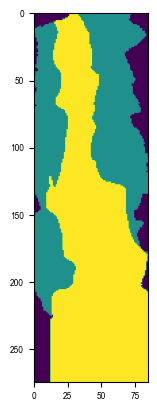

In [26]:
zone = ml.bas6.ibound.array[0]
zone2 = ml.bas6.ibound.array[1]
zone = zone+zone2
plt.imshow(zone)
# plt.figure()
# plt.imshow(zone2)
zone = conda_scripts.arich_functions.array2rc(zone,name = 'zone').drop(columns = ['row', 'column'])
# zone2 = conda_scripts.arich_functions.array2rc(zone2,name = 'zone2').drop(columns = ['row', 'column'])

In [27]:
obsdata = df.copy()
obsdata = obsdata.drop_duplicates("Station Name")
obsdata = pd.merge(obsdata, zone, on = ['i','j'])
print(obsdata.shape)
# obsdata = pd.merge(obsdata, zone2, on = ['i','j'])
# print(obsdata.shape)
obsdata.loc[:,'xl'] ,obsdata.loc[:,'yl'] = ml.modelgrid.get_local_coords(obsdata.Easting.values, obsdata.Northing.values)
obsdata.loc[:,['pckg','arr','intyp', 'klay']] = ['BAS','HD',"C",-111]
obsdata.loc[obsdata.Shallow,'klay'] = 0
obsdata.loc[obsdata.Deep,'klay'] = 3
#set layer to layer 1 where zone/ibound ==1 (ie highlands)
obsdata.loc[obsdata.zone==1,'klay'] = 0
# remove locations no in ibound2
# obsdata = obsdata.loc[obsdata.zone2!=0,:]
obsdata = obsdata.loc[obsdata.klay>=0]
obsdata = obsdata.loc[:,['pckg','arr','intyp', 'klay', 'xl', 'yl','Station Name']]
print(obsdata.shape)

(200, 56)
(200, 7)


In [28]:
obsdata.klay.value_counts()

klay
0    140
3     60
Name: count, dtype: int64

In [29]:
obsdata

,pckg,arr,intyp,klay,xl,yl,Station Name
0,BAS,HD,C,0,2466.168233,122683.184510,Son0001
1,BAS,HD,C,0,2752.660097,122802.747932,Son0002
2,BAS,HD,C,3,16115.989147,135497.813380,Son0004
3,BAS,HD,C,0,16247.478039,135155.514476,Son0005
4,BAS,HD,C,0,16246.486019,134755.499869,Son0006
...,...,...,...,...,...,...,...
195,BAS,HD,C,3,12133.577013,69992.029911,Son0565
196,BAS,HD,C,3,9418.438951,29264.197895,WRM22-0063_2
197,BAS,HD,C,3,23970.885150,59490.306068,WRM23-0004_1
198,BAS,HD,C,3,23962.452565,58197.539255,WRM23-0005_1


In [30]:
hyd.ModflowHyd.get_default_dtype()

dtype([('pckg', 'S3'), ('arr', 'S2'), ('intyp', 'S1'), ('klay', '<i4'), ('xl', '<f4'), ('yl', '<f4'), ('hydlbl', 'S14')])

In [31]:
ml.remove_package('HYD')

StopIteration: Package name HYD not found in Package list

In [32]:
ml.model_ws

'C:\\GSP\\sv\\model\\SV_mod_V2_owhm2\\master'

In [33]:
hello = hyd.ModflowHyd(ml, 
           nhyd=obsdata.shape[0], 
           ihydun=None, 
           hydnoh=-9999.0, 
           # obsdata=[['BAS', 'HD', 'C', 0, 0.0, 0.0, 'HOBS1']], 
                          obsdata=obsdata.values, 
           extension=['hyd', 'hyd.bin'], 
           unitnumber=70, 
           filenames="hyd.hyd")
hello.write_file()

# load hydmod output

In [34]:
obsdata.drop_duplicates('Station Name').to_csv(os.path.join('..','waterlevel', 'GWLE','hydobs_locations.csv'), float_format='%.3f')

In [35]:
import forward_run
from importlib import reload
reload(forward_run)

loading forward_run.py from C:\GSP\sv\model\update_2024\scripts


<module 'forward_run' from 'C:\\GSP\\sv\\model\\update_2024\\scripts\\forward_run.py'>

In [36]:
forward_run.run_all_hyd_obs(workspace)

there are 21000 observations in the GWLE observation absolute elev file


C:\GSP\sv\model\update_2024\scripts\forward_run.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


there are 21000 observations in the GWLE observation drawdown elev file
writing absolute heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_asbolute_mod_heads.csv
writing drawdon heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_drawdown_mod_heads.csv
writing rolling heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_rolling_mod_heads.csv
Done writing to files


C:\GSP\sv\model\update_2024\scripts\forward_run.py:497: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


In [37]:
s = forward_run.load_hydobs(workspace)
s = forward_run.create_diff_for_hydobs(s,numper_diff=5)
s = forward_run.down_sample_hydobs(s, numper_diff=5, keep_every=4)
s = forward_run.create_obs_from_hyd(s)


C:\GSP\sv\model\update_2024\scripts\forward_run.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


# creating 10-year rolling average from GWLE

In [47]:
bigobj = forward_run.load_hydobs(workspace)
abs_small = forward_run.down_sample_hydobs(bigobj, numper_diff = 5,keep_every = 4)
abs_obs = forward_run.create_obs_from_hyd(abs_small)


# rolling observations
roll = forward_run.rolling_mean(bigobj,nyears=10)
roll_obs = forward_run.create_obs_from_hyd(roll)
roll_obs


C:\GSP\sv\model\update_2024\scripts\forward_run.py:497: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


,Station,date,meas
0,Son0001,1975-12-31,372.931061
1,Son0002,1975-12-31,372.937775
2,Son0004,1975-12-31,432.911865
3,Son0005,1975-12-31,449.240356
4,Son0006,1975-12-31,445.313843
...,...,...,...
1195,Son0565,2025-12-31,23.468372
1196,WRM22-0063_2,2025-12-31,-702.787903
1197,WRM23-0004_1,2025-12-31,-2.768450
1198,WRM23-0005_1,2025-12-31,-3.384409


In [44]:
s.loc[:,'year'] = s.date.dt.year
s.loc[:,'month'] = s.date.dt.month
f = s.set_index('year').loc[:,['month','Son0001']].set_index('month', append = True).unstack()
f = f.where(f.isnull(),1)
f = f.droplevel(0,1).fillna(0)

KeyError: "['Son0001'] not in index"

In [46]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

# Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
# Cols = ['A', 'B', 'C', 'D']
# df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(f, annot=True)

NameError: name 'f' is not defined

In [ ]:
def load_hydobs(workspace):
    out = flopy.utils.HydmodObs(os.path.join(workspace, 'output', 'SV_hyd.hyd'),)
    out = out.get_dataframe(start_datetime='12/1/1969')
    out = out.rename(columns = lambda x: x[6:]  if len(x)>12 else x)
    out = out.drop(columns = 'totim')

    out = out.reindex(pd.date_range('1975-01-01', freq = 'MS', periods = 525))

    return out

def create_obs_from_hyd(sim):
    sim = sim.stack()
    sim.index = sim.index.set_names(['Station', 'date'])
    sim = sim.swaplevel().to_frame('meas').reset_index()

    return sim




# load hydmod output

In [48]:
out = flopy.utils.HydmodObs(os.path.join(workspace, 'output', 'SV_hyd.hyd'),)
out = out.get_dataframe(start_datetime='12/1/1969')
out = out.rename(columns = lambda x: x[6:]  if len(x)>12 else x)
out = out.drop(columns = 'totim')
display(out.head())
display(out.tail())

,Son0001,Son0002,Son0004,Son0005,Son0006,Son0007,Son0008,Son0009,Son0010,Son0011,...,Son0560,Son0561,Son0562,Son0563,Son0564,Son0565,WRM22-0063_2,WRM23-0004_1,WRM23-0005_1,WRM23-0009_1
1969-12-01,766.000000,753.000000,449.000000,451.000000,454.000000,454.000000,459.000000,448.000000,413.000000,407.000000,...,19.000000,3.000000,3.000000,53.000000,22.000000,22.000000,2.000000,7.000000,9.000000,5.000000
1970-01-01,694.689575,692.404541,453.383118,451.106903,454.011017,454.011017,458.682800,447.812592,413.223572,407.174774,...,25.237883,7.374812,7.374812,27.563177,22.792912,22.792912,0.496568,7.165608,8.577147,4.678993
1970-02-01,676.242065,675.412415,454.592285,451.260254,454.005249,454.005249,458.103668,447.418793,413.380737,407.336151,...,24.999172,6.007831,6.007831,24.143173,22.812084,22.812084,0.612858,7.296941,8.452708,4.516655
1970-03-01,661.955505,661.422363,454.555847,451.425354,453.984650,453.984650,457.384827,446.887543,413.477753,407.468628,...,24.542950,4.984506,4.984506,23.234425,22.804089,22.804089,0.291685,7.351976,8.415576,4.444497
1970-04-01,647.966675,647.606445,453.917877,451.607880,453.924286,453.924286,456.440125,446.142670,413.293243,407.621094,...,24.084511,4.168756,4.168756,23.406446,22.862015,22.862015,-0.335466,7.445153,8.457936,4.488938


,Son0001,Son0002,Son0004,Son0005,Son0006,Son0007,Son0008,Son0009,Son0010,Son0011,...,Son0560,Son0561,Son0562,Son0563,Son0564,Son0565,WRM22-0063_2,WRM23-0004_1,WRM23-0005_1,WRM23-0009_1
2018-06-01,136.967758,136.969360,330.342163,321.175751,332.012695,332.012695,352.080688,355.923950,360.815979,356.516296,...,33.814034,-4.687115,-4.687115,23.006899,23.438652,23.438652,-709.263367,-2.248643,-3.024461,-5.296715
2018-07-01,136.597412,136.599045,330.240509,321.060059,331.892761,331.892761,351.974152,355.803040,360.688080,356.400757,...,33.707645,-4.830619,-4.830619,20.839344,22.570490,22.570490,-711.028320,-2.245861,-3.215965,-5.340075
2018-08-01,136.223038,136.224655,330.108948,320.938080,331.766968,331.766968,351.858185,355.681305,360.536743,356.285583,...,33.590618,-5.049053,-5.049053,19.399673,21.587118,21.587118,-712.058472,-2.286374,-3.493326,-5.445835
2018-09-01,135.852173,135.853790,329.969360,320.813995,331.638977,331.638977,351.736053,355.561371,360.371643,356.171204,...,33.544846,-5.257318,-5.257318,20.218697,21.221453,21.221453,-712.798462,-2.351109,-3.679151,-5.547554
2018-10-01,135.494797,135.496384,329.837494,320.692535,331.513489,331.513489,351.613800,355.446259,360.206390,356.059662,...,33.543388,-5.416766,-5.416766,20.609636,21.051832,21.051832,-713.298584,-2.420908,-3.798765,-5.628523


In [54]:
import importlib

In [181]:
importlib.reload(forward_run)

loading forward_run.py from C:\GSP\sv\model\update_2024\scripts


C:\GSP\sv\model\update_2024\scripts\forward_run.py:149: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:333: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:363: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:608: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\forward_run.py:647: DeprecationWarning: invalid escape sequence \s


<module 'forward_run' from 'C:\\GSP\\sv\\model\\update_2024\\scripts\\forward_run.py'>

# reshape and shuffle the GWLE data to look like hydmod dataframe

In [182]:
res = df.loc[:,['Station Name', "predicted",'date']].set_index(['date','Station Name']).unstack(1)
res.columns = res.columns.droplevel(0)
res = res.rename_axis(None, axis=1)
res = res.rename_axis(None, axis=0)
diff_mat = out - res.reindex_like(out)

diff_mat = diff_mat.dropna(how = 'all', axis = 0)

diff_mat = diff_mat.loc[:,diff_mat.abs().max().sort_values(ascending = True).index]

# export the GWLE data in format to ingest via pest

In [183]:
gwle_diff = forward_run.create_diff_for_hydobs(res,numper_diff=5)
gwle_diff = forward_run.down_sample_hydobs(gwle_diff, numper_diff=5, keep_every=4)
gwle_diff = forward_run.create_obs_from_hyd(gwle_diff)

C:\GSP\sv\model\update_2024\scripts\forward_run.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [184]:
# gwle_abs = forward_run.create_diff_for_hydobs(res,numper_diff=5)
gwle_abs = forward_run.down_sample_hydobs(res, numper_diff=5, keep_every=4)
gwle_abs = forward_run.create_obs_from_hyd(gwle_abs)

In [185]:
#rolling 18month
roll_short = forward_run.rolling_mean(res,nyears = None, nmonths=18)
roll_short_obs = forward_run.create_obs_from_hyd(roll_short)
roll_short_obs.tail(3)

window: 18


,Station,date,meas
5797,WRM23-0004_1,2018-09-01,-18.361782
5798,WRM23-0005_1,2018-09-01,-22.637692
5799,WRM23-0009_1,2018-09-01,-22.115015


In [188]:
# rolling observations
roll = forward_run.rolling_mean(res,nyears=8, nmonths = None )
roll_obs = forward_run.create_obs_from_hyd(roll)
roll_obs

window: 96


,Station,date,meas
0,Son0001,1986-09-01,642.672410
1,Son0002,1986-09-01,700.207976
2,Son0004,1986-09-01,487.884889
3,Son0005,1986-09-01,475.924218
4,Son0006,1986-09-01,473.501790
...,...,...,...
995,Son0565,2018-09-01,14.274536
996,WRM22-0063_2,2018-09-01,-11.702765
997,WRM23-0004_1,2018-09-01,-17.986172
998,WRM23-0005_1,2018-09-01,-21.425896


In [196]:

forward_run.rolling_mean(res, nyears = 8, )


window: 96


,Son0001,Son0002,Son0004,Son0005,Son0006,Son0007,Son0008,Son0009,Son0010,Son0011,...,Son0560,Son0561,Son0562,Son0563,Son0564,Son0565,WRM22-0063_2,WRM23-0004_1,WRM23-0005_1,WRM23-0009_1
1986-09-01,642.672410,700.207976,487.884889,475.924218,473.501790,468.032946,467.242040,457.655765,422.335589,401.679452,...,16.254513,-18.026567,-13.514147,55.990372,16.743404,16.082420,-5.044297,2.698454,1.579178,1.928929
1994-09-01,641.051513,699.106783,487.415928,477.693686,475.446055,470.448586,467.518331,457.150775,420.989539,403.171492,...,-1.269552,-55.631013,-47.881487,56.207326,13.402070,12.697542,-7.149242,-2.675856,-3.399033,-3.651289
2002-09-01,639.602323,697.396458,488.974882,477.848904,474.400451,467.252724,467.930768,458.097231,421.720199,404.836462,...,-6.825294,-65.010897,-56.441753,55.460778,14.355221,13.423970,-8.825801,-9.169170,-10.759870,-11.766325
2010-09-01,633.591729,691.208401,479.410602,472.968917,470.415376,461.852760,466.749659,458.511572,421.590952,406.128882,...,-15.187838,-72.296950,-64.176420,55.305063,18.359230,15.798722,-11.438644,-18.278143,-21.544073,-21.948275
2018-09-01,628.074510,683.867906,488.122742,477.175919,473.207703,466.470838,466.453181,456.133212,420.243938,404.637202,...,-26.455485,-79.871333,-66.955951,49.567374,18.434602,14.274536,-11.702765,-17.986172,-21.425896,-22.295243


In [197]:
forward_run.rolling_mean(res, nmonths = 18,nyears = None).tail()


window: 18


,Son0001,Son0002,Son0004,Son0005,Son0006,Son0007,Son0008,Son0009,Son0010,Son0011,...,Son0560,Son0561,Son0562,Son0563,Son0564,Son0565,WRM22-0063_2,WRM23-0004_1,WRM23-0005_1,WRM23-0009_1
2012-09-01,630.362056,685.957833,492.651297,482.368133,477.161644,469.051111,468.761156,458.154472,422.268850,408.194053,...,-25.889259,-80.227874,-68.051262,53.404438,20.929620,17.515837,-11.482007,-18.229289,-22.339194,-21.826623
2014-03-01,627.167556,683.583167,483.108439,473.860406,471.706800,462.879117,466.526667,455.962444,422.532425,403.422258,...,-24.189685,-75.390889,-63.506668,48.083295,18.036745,14.103006,-11.261767,-20.335113,-23.017527,-24.672937
2015-09-01,627.509389,683.450889,481.802978,474.134472,469.048672,463.204233,465.217333,454.488433,418.865513,403.190017,...,-30.869697,-82.145047,-69.480586,47.266495,17.709369,13.533491,-12.127796,-17.867790,-20.589242,-22.230573
2017-03-01,627.054111,682.971889,488.881742,474.541794,470.036628,465.985300,465.319789,455.209828,415.966718,403.090677,...,-22.432703,-77.931174,-65.652225,48.174595,18.001421,13.468855,-11.546906,-15.807024,-19.419551,-20.893505
2018-09-01,627.204500,682.456278,491.991386,481.275533,477.712406,471.055272,465.837033,455.874178,420.103515,404.281734,...,-35.491336,-88.138016,-72.003343,49.517492,16.863468,11.973629,-12.550101,-18.361782,-22.637692,-22.115015


In [100]:
# pd.date_range(ml.dis.start_datetime,periods = ml.dis.nper, freq = 'M')

In [200]:
print(f'there are {gwle_diff.shape[0]} observations in the GWLE observation drawdown elev file')
print(f'there are {gwle_abs.shape[0]} observations in the GWLE absolute elev file')
print(f'there are {roll_obs.shape[0]} observations in the GWLE observation rolling elev file')
print(f'there are {roll_short_obs.shape[0]} observations in the GWLE observation rolling 18month elev file\n')


f_abs = os.path.join(os.path.join(workspace, "GWLE_OBS", 'gwle_asbolute_observed_heads.csv'))
print(f"writing absolute heads to {f_abs}")
f_diff = os.path.join(os.path.join(workspace, "GWLE_OBS", 'gwle_drawdown_observed_heads.csv'))
print(f"writing drawdon heads to {f_diff}")
f_roll = os.path.join(os.path.join(workspace, "GWLE_OBS", 'gwle_rolling_observed_heads.csv'))
print(f"writing rolling heads to {f_roll}")
f_roll_short = os.path.join(os.path.join(workspace, "GWLE_OBS", 'gwle_rolling_18month_observed_heads.csv'))
print(f"writing rolling heads to {f_roll_short}")

gwle_abs.to_csv(f_abs)
gwle_diff.to_csv(f_diff)
roll_obs.to_csv(f_roll)
roll_short_obs.to_csv(f_roll_short)

f_abs = os.path.join('..','waterlevel', 'GWLE','gwle_asbolute_observed_heads.csv')
print(f"writing absolute heads to {f_abs}")
f_diff = os.path.join('..','waterlevel', 'GWLE', 'gwle_drawdown_observed_heads.csv')
print(f"writing drawdon heads to {f_diff}")
f_roll = os.path.join('..','waterlevel', 'GWLE', 'gwle_rolling_observed_heads.csv')
print(f"writing f_roll heads to {f_roll}")

f_roll_short = os.path.join(os.path.join('..', 'waterlevel',"GWLE", 'gwle_rolling_18month_observed_heads.csv'))
print(f"writing rolling heads to {f_roll_short}")

gwle_abs.to_csv(f_abs)
gwle_diff.to_csv(f_diff)
roll_obs.to_csv(f_roll)
roll_short_obs.to_csv(f_roll_short)

there are 21000 observations in the GWLE observation drawdown elev file
there are 21000 observations in the GWLE absolute elev file
there are 1000 observations in the GWLE observation rolling elev file
there are 5800 observations in the GWLE observation rolling 18month elev file

writing absolute heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_asbolute_observed_heads.csv
writing drawdon heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_drawdown_observed_heads.csv
writing rolling heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_rolling_observed_heads.csv
writing rolling heads to C:\GSP\sv\model\SV_mod_V2_owhm2\master\GWLE_OBS\gwle_rolling_18month_observed_heads.csv
writing absolute heads to ..\waterlevel\GWLE\gwle_asbolute_observed_heads.csv
writing drawdon heads to ..\waterlevel\GWLE\gwle_drawdown_observed_heads.csv
writing f_roll heads to ..\waterlevel\GWLE\gwle_rolling_observed_heads.csv
writing rolling heads to ..\waterlevel\GWLE\gwle_rolling_1

In [191]:
outf = os.path.join('..','waterlevel','hydros')
os.makedirs(outf,exist_ok=True)

In [199]:
import matplotlib.dates as mdates

for n,stat in gwle_abs.groupby('Station'):
    ax = stat.plot(x = 'date', y='meas', label = 'GWLE',marker = '.')
    roll_obs.query(f"Station=='{n}'").plot(x = 'date', y='meas', ax =ax, marker = 's' , mfc = 'w', label = 'GWLE - 10-Year')
    roll_short_obs.query(f"Station=='{n}'").plot(x = 'date', y='meas', ax =ax, marker = 'o', mfc = 'k', label = 'GWLE - 18-Month ')
    
    # Set major ticks to every 5 years starting at 1970
    # ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Every 5 years
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years
    ax.set_title(n); ax.grid(True)
    # Set x-axis limit to ensure it starts from 1970
    plt.xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('2020-01-01'))
    # Rotate and align the tick labels
    plt.xticks(rotation=45, ha='right')
    conda_scripts.plot_help.yrange_(ax)
    plt.savefig(os.path.join(outf, n+'.png'), dpi = 250, bbox_inches = "tight")
    plt.close()
    

# export again the station info

In [ ]:
import cartopy.crs as ccrs
import contextily as ctx

In [ ]:
z = np.genfromtxt(os.path.join(ml.model_ws, 'model_arrays', 'zonation_3.csv'), delimiter = ' ')

zotther = z.copy()
zotther[zotther>8] = 0

zones = {i:zotther  for i in range(7) }
zones[1] = z
plt.imshow(zones[1])

z = conda_scripts.arich_functions.array2rc(zones[1],'zone').astype({'zone':int})

aliases = {1: 'Bay', 2: 'EastSide', 3: 'SouthCent', 4: 'Kenwood', 5: 'VOM', 6: 'AguaCal',7:'WestSide',8:'CitySon',9:'Highlands'}
z.loc[:,'zone'] =z.loc[:,'zone'].replace(aliases)
z = z.query("zone!=0")

geoms = conda_scripts.arich_functions.get_model_shp(ml.modelgrid, 2226).drop(columns = ['row','col'])

z = gpd.GeoDataFrame(pd.merge(z, geoms, on = ['i','j']))
zplot = z.dissolve('zone').reset_index()

In [ ]:

plt.figure(figsize = (6,8), dpi = 250)
ax = plt.subplot(1,1,1, projection = ccrs.epsg(2226))
zplot.exterior.plot(ax = ax,  )
zplot.plot('zone', ax = ax, alpha =.5  )
conda_scripts.plot_help.label_poly(zplot,ax, 'zone',color = 'g', text_color='k') 
conda_scripts.arich_functions.add_basemaps(ax)
ax.set_title('zone names')
plt.savefig('map_of_zones_for_PEST.png', dpi = 250)

In [ ]:
vcounts = pd.read_csv(r"C:\GSP\waterlevel\GIS\hydro_experiment\hydros__v3_SON_allmodmonths_to_20240808\seasinfo_w_predicted_SON.csv")
vcounts = vcounts.loc[:,'Station Name'].value_counts().to_frame("num_meas")
vcounts = vcounts.loc[~vcounts.index.str.contains('mod')]

In [ ]:
vcounts

In [ ]:
dfinfo = pd.merge(df.loc[:,['Station Name', 'station_no', 
       'Site', 'Easting', 'Northing', 'Latitude',
       'Longitude',  'rasterelevation', 'slope',
       'Simple_Bou', 'Complete_B', 'isostatic',  'Geol_Krig',
 
      'Depth', 'i', 'j', 
       ]].drop_duplicates('Station Name'),
                  z, on = ['i','j'], how = 'left')
dfinfo = dfinfo.drop(columns = ['geometry','row','column'])

dfinfo = pd.merge(dfinfo, vcounts,on = 'Station Name' )

dfinfo.to_csv(os.path.join(workspace, "GWLE_OBS",'gwle_station_info.csv'), float_format='%.3f')


dfinfo.to_csv(os.path.join('..','waterlevel', 'GWLE','gwle_station_info.csv'), float_format='%.3f')

In [ ]:
dfinfo

In [ ]:
diff_mat.dropna(how = 'all', axis = 1)

In [ ]:
df.loc[df.loc[:,'Station Name'].isin(diff_mat.loc[:,~diff_mat.columns.isin(diff_mat.dropna(how = 'all', axis = 1).columns)].columns)]

In [ ]:
print('all of these columns are probably null in the GWLE values')
diff_mat.loc[:,~diff_mat.columns.isin(diff_mat.dropna(how = 'all', axis = 1).columns)]

In [ ]:
from importlib import reload
import helpers
from helpers import make_plot
reload(helpers)

In [ ]:
from helpers import make_plot

In [ ]:
c = 0
for   stat in d:
    # print(stat)
    row = df.query(f"`Station Name`=='{stat}'")
    
    rowind = row['i'].unique()[0]
    column = row['j'].unique()[0]
    
    x = row['Easting'].unique()[0]
    y = row['Northing'].unique()[0]
    fig, ax = helpers.make_plot('',x,y)

    ax.set_title(stat)
    res.loc[:,stat].rename("GWLE").plot(ax = ax, label = "GWLE")
    out.loc[:,stat].plot(ax = ax ,label = "OWHM")
    out.loc[:,stat].head(1).plot(ax = ax ,c = 'r', marker = 'o', label = "Starting")
    ax.legend()
    
    # lays = row.iloc[[0],:].reset_index().at[0,'mlays']
    # lays = ', '.join([str(j+1) for j in lays])
    # ax.set_title( "".join(row.obsname.unique()[0].split("_")[:-1])  )

    ph.yrange_(ax)
    ax.grid(True)
    print(stat, rowind, column, row.shape,os.path.abspath(os.path.join(out_folder,'hydros', stat+'.png' )))
    plt.savefig(os.path.join(out_folder,'hydros', stat+'.png' ))
    plt.close(fig)
    
    

In [ ]:
import pandas as pd

def process_csv(input_file, output_file, threshold_x, threshold_y, threshold_z, threshold_a, threshold_b):
    """
    Processes a CSV file based on given criteria.
    
    Args:
    input_file: Path to the input CSV file.
    output_file: Path for the output CSV file.
    threshold_x: Threshold value for station number SL1 0329.
    threshold_y: Threshold value for station number so10330.
    threshold_z: Threshold value for station number son 0346.
    threshold_a: Threshold value for station number s o n 0549.
    threshold_b: Threshold value for station number s o n 0550.
    """
    
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(input_file)
    print(df.shape)
    # Remove rows with specific station numbers
    df = df[~df['station_name'].str.contains('Son0067')]
    df = df[~df['station_name'].str.contains('Son0079')]
    df = df[~df['station_name'].str.contains('Son0085')]
    df = df[~df['station_name'].str.contains('Son0346')]
    df = df[~df['station_name'].str.contains('Son0082')]
    df = df[~df['station_name'].str.contains('Son0097')]
    df = df[~df['station_name'].str.contains('Son0130')]
    df = df[~df['station_name'].str.contains('Son0148')]
    df = df[~df['station_name'].str.contains('Son0216')]
    df = df[~df['station_name'].str.contains('Son0220')]
    df = df[~df['station_name'].str.contains('Son0221')]
    df = df[~df['station_name'].str.contains('Son0223')]
    df = df[~df['station_name'].str.contains('Son0231')]
    df = df[~df['station_name'].str.contains('Son0233')]
    df = df[~df['station_name'].str.contains('Son0247')]
    
    # Replace values based on station numbers and thresholds
    df.loc[(df['station_name'] == 'Son0329') & (df['Manual Measurement'] > threshold_x), 'Manual Measurement'] = np.nan
    df.loc[(df['station_name'] == 'Son0330') & (df['Manual Measurement'] < threshold_y), 'Manual Measurement'] = np.nan

    df.loc[(df['station_name'] == 'Son0346') & (df['Manual Measurement'] > threshold_z), 'Manual Measurement'] = np.nan
    df.loc[(df['station_name'] == 'Son0549') & (df['Manual Measurement'] < threshold_a), 'Manual Measurement'] = np.nan
    df.loc[(df['station_name'] == 'Son0550') & (df['Manual Measurement'] < threshold_b), 'Manual Measurement'] = np.nan
    
    df.loc[(df['station_name'] == 'Son0040') & (df['Manual Measurement'] > 975), 'Manual Measurement'] = np.nan
    df.loc[(df['station_name'] == 'Son0185') & (df['Manual Measurement'] > 820), 'Manual Measurement'] = np.nan
    
    # Convert timestamp to datetime
    t = pd.to_datetime(df['Timestamp'], utc=True)
    
    # Filter data
    # Filter data
    df = df[~((df['station_name'] == 'Son0330') & (
        (t >= pd.to_datetime('2015-01-01', utc=True)) & (df['Manual Measurement'] >= -35)))]


    
    df = df.dropna(subset = 'Manual Measurement')
    
    print(df.shape)


    df.to_csv(output_file, index=False)

    return df
    
# Example usage:
input_file = 'your_input_file.csv'
output_file = 'filtered_data.csv'
threshold_x = -2
threshold_y = -55
threshold_z = 80
threshold_a = 60
threshold_b = 60

input_file = r"C:\GSP\waterlevel\regression_data\all_gw_for_surf_2024_05_01.csv"
output_file = r"C:\GSP\waterlevel\regression_data\all_gw_for_surf_2024_08_08.csv"
dfal = process_csv(input_file, output_file, threshold_x, threshold_y, threshold_z, threshold_a, threshold_b)

In [ ]:
dfal = conda_scripts.utils.load_all_gw_wiski.load_all_gw(download=False,filter_manual=True,outfolder=r"C:\GSP\waterlevel\regression_data", outfile="all_gw_for_surf_2024_08_08.csv")

In [ ]:
    for stat in ['Son0085','Son0329',
'Son0330',
'Son0346',
'Son0549',
'Son0550']:
        fig, ax = plt.subplots()
        cdf= dfal.query(f"station_name=='{stat}'")
        for t, ddd in cdf.groupby('Param_reclass'):

            ddd.plot.scatter(ax = ax, x = 'Timestamp', y = 'Manual Measurement', label = t, legend = True )
        ax.set_title(stat)

In [ ]:
# Replace values based on station numbers and thresholds
dfal.loc[(dfal['station_name'] == 'Son0329') ]
# df.loc[(df['station_name'] == 'Son0330') & (df['Manual Measurement'] < threshold_y), 'Manual Measurement'] = np.nan
# df.loc[(df['station_name'] == 'Son0346') & (df['Manual Measurement'] > threshold_z), 'Manual Measurement'] = np.nan
# df.loc[(df['station_name'] == 'Son0549') & (df['Manual Measurement'] < threshold_a), 'Manual Measurement'] = np.nan
# df.loc[(df['station_name'] == 'Son0550') & (df['Manual Measurement'] < threshold_b), 'Manual Measurement'] = np.nan

In [ ]:

bad = out.loc[:,out.nunique()==1]
bad = list(map(lambda x: x[6:], bad))
bad

In [ ]:
df.loc[:,'measname'] = df.loc[:,'Station Name']+"_"+df.loc[:,'kstp'].astype(str)

In [ ]:
df.query(f"`Station Name`=='Son0001'").sort_values('kstp').kstp.duplicated().sum()

In [ ]:
f= df.query(f"`Station Name`=='Son0001'").sort_values('kstp')
f.loc[f.kstp.duplicated()]

In [ ]:
import random
import string

def generate_random_string(length=10):
    # Define the pool of characters (letters and digits)
    characters = string.ascii_letters + string.digits
    # Randomly select 'length' characters from the pool
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

In [ ]:
def dd(ml, station, hds):

    q = hds.query(f"`Station Name`=='{station}'").sort_values('kstp')
    q = q.drop_duplicates('kstp')
    # print(q)
    hall = []
    
    for i in range(q.shape[0]-1):
        ts = q.iloc[[i,i+1],:].loc[:,['kstp','predicted']].values
        wellname = q.iloc[[i],:].loc[:,['measname']].values[0][0]
        obsname = q.iloc[[i+1],:].loc[:,['measname']].values[0][0]+'_dd0'
        names =  copy.deepcopy([q.iloc[[i],:].loc[:,['measname']].values[0][0]+'_hd1', 
                                q.iloc[[i+1],:].loc[:,['measname']].values[0][0]+'xxdd0'])
        # names = [generate_random_string(length=10),generate_random_string(length=10)]
        obsname = copy.deepcopy(wellname+'_hd0')
        row = q.i.unique()[0]
        column = q.j.unique()[0]
        # print(wellname)
        print(obsname)
        print(names)
        h = hfb.HeadObservation(ml, 
                    tomulth=1.0, 
                    obsname= q.iloc[[i+1],:].loc[:,['measname']].values[0][0]+'xxhd0', 
                    layer=0, 
                    row=row, 
                    column=column, 
                    irefsp=-i, 
                    roff=0.0, 
                    coff=0.0,
                    itt=2,
                    tmax=None, 
                    mlay=None, 
                    time_series_data=ts, 
                    names=names)

        hall.extend([copy.deepcopy(h)])
        
    return hall

heads = dd(ml, 'Son0001', df)
hob = flopy.modflow.ModflowHob(ml, iuhobsv=51, hobdry=-9999.,

                               obs_data=heads)
hob.write_file()

In [ ]:
hob.obs_data[0].time_series_data

In [ ]:
len('SV-F06-01_62')

In [ ]:
h = hfb.HeadObservation(ml, 
                    tomulth=1.0, 
                    obsname='HOBS', 
                    layer=0, 
                    row=0, 
                    column=0, 
                    irefsp=None, 
                    roff=0.0, 
                    coff=0.0,
                    itt=1,
                    tmax=None, 
                    mlay=None, 
                    time_series_data=None, 
                    names=None)

In [ ]:
df

In [ ]:
ml.modelgrid.get_local_coords(obsdata.Easting, obsdata.Northing)

In [ ]:
flopy.utils.HydmodObs(os.path.join(workspace, 'output', 'SV_hyd.hyd'))

In [ ]:
os.listdir(os.path.join(workspace, 'output'))